In [72]:
import pandas as pd

df = pd.read_csv('/content/dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   demam                      39 non-null     object
 1   nyeri_otot                 39 non-null     object
 2   sakit_kepala               39 non-null     object
 3   nyeri_belakang_mata        39 non-null     object
 4   bintik_bintik_merah_kecil  39 non-null     object
 5   mual                       39 non-null     object
 6   muntah                     39 non-null     object
 7   nyeri_abdome               39 non-null     object
 8   nyeri_sendi                39 non-null     object
 9   dehidrasi                  39 non-null     object
 10  diare                      39 non-null     object
 11  hilang_selera_makan        39 non-null     object
 12  dehidrasi.1                39 non-null     object
 13  riwayat                    39 non-null     object
 14  uji_lab     

In [73]:
atribute = ['demam','nyeri _otot','sakit_kepala','nyeri_belakang_mata','bintik_bintik_merah_kecil','mual','muntah','nyeri_abdome','nyeri_sendi','dehidrasi','diare','hilang_selera_makan','dehidrasi','riwayat','uji_lab']

varX = pd.get_dummies(df[['demam','nyeri_otot','sakit_kepala','nyeri_belakang_mata','bintik_bintik_merah_kecil','mual','muntah','nyeri_abdome','nyeri_sendi','dehidrasi','diare','hilang_selera_makan','dehidrasi','riwayat']])

varX.head()

,demam_iya,demam_tidak,nyeri_otot_iya,nyeri_otot_tidak,sakit_kepala_iya,sakit_kepala_tidak,nyeri_belakang_mata_iya,nyeri_belakang_mata_tidak,bintik_bintik_merah_kecil_iya,bintik_bintik_merah_kecil_tidak,...,dehidrasi_tidak,diare_it,diare_iya,diare_tidak,hilang_selera_makan_iya,hilang_selera_makan_tidak,dehidrasi_iya,dehidrasi_tidak,riwayat_ada,riwayat_tidak
0,1,0,1,0,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,1,0
1,0,1,0,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
2,1,0,0,1,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
3,1,0,0,1,1,0,0,1,1,0,...,1,0,0,1,0,1,0,1,0,1
4,1,0,0,1,1,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,1


In [74]:
from sklearn import tree

hasil = tree.DecisionTreeClassifier(criterion='entropy')
data_hasil = hasil.fit(varX,df['uji_lab'])

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(varX, df['uji_lab'], test_size=0.25)

In [76]:
from sklearn.metrics import accuracy_score

y_pred = hasil.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("akurasi dari deteksi DBD pada set pengujian :", accuracy)

akurasi dari deteksi DBD pada set pengujian : 1.0


In [77]:
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(data_hasil, out_file='hasil.dot', feature_names=list(varX.columns.values), class_names=['positif','negatif'], rounded=True, filled=True)

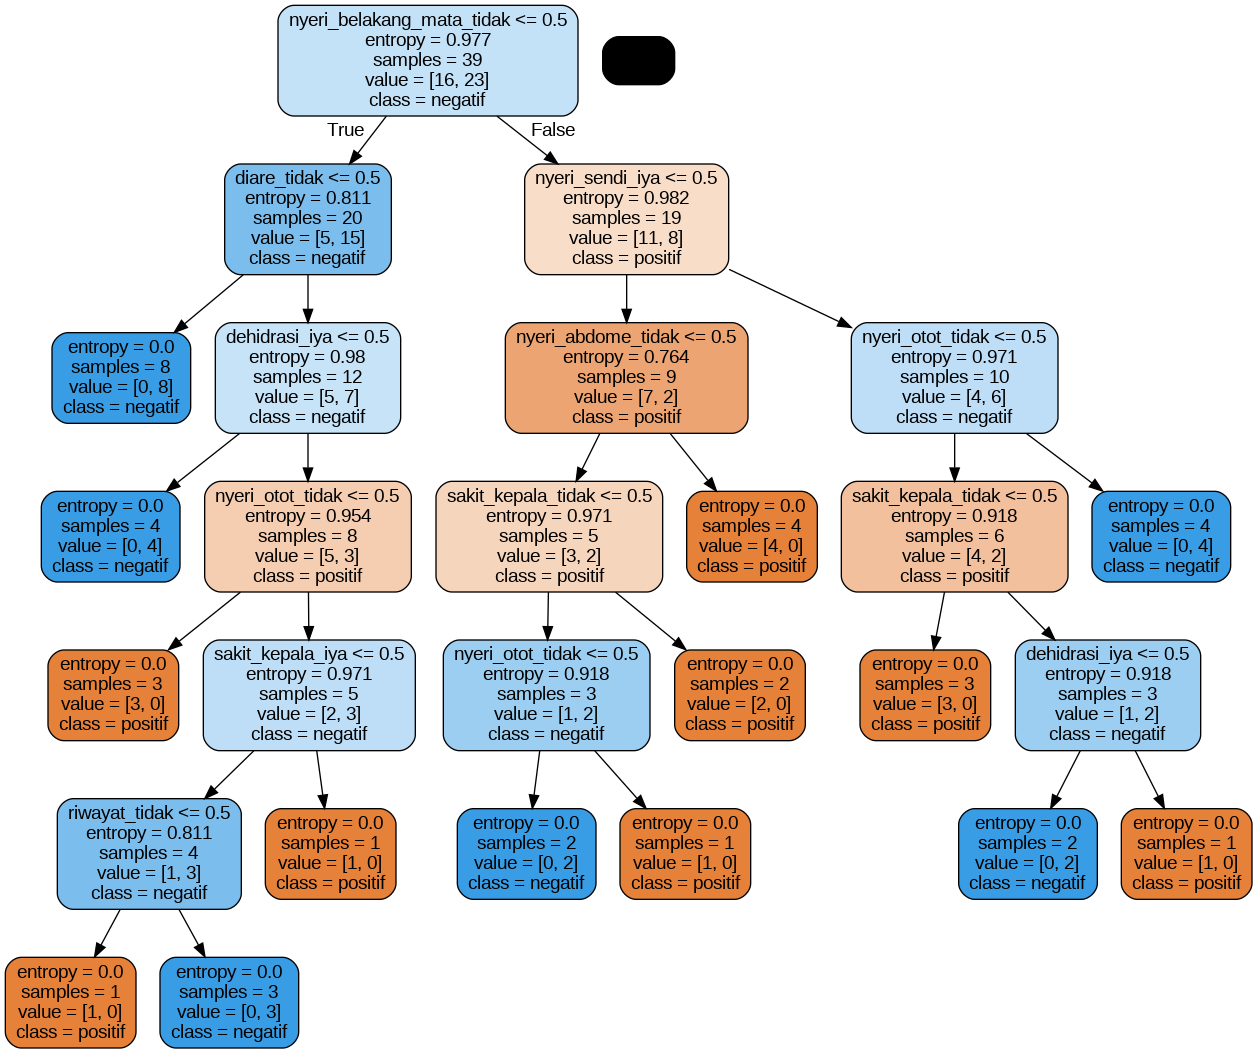

In [78]:
dot_data = tree.export_graphviz(data_hasil, out_file=None, feature_names=list(varX.columns.values), class_names=['positif','negatif'], rounded=True, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())